# BERT Sentiment Analysis
BERT is Bidirectional Encoder Repersentations from Transformers
Ref - http://jalammar.github.io/illustrated-bert/


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import torch
from tqdm.notebook import tqdm

## Data Extraction

In [2]:
# read the data set into df 
df = pd.read_csv("smile-annotations-final.csv",names=["Id","Text","Category"])
df.set_index("Id",inplace=True) #set the Id couluns as the index
df

,Text,Category
Id,,
611857364396965889,@aandraous @britishmuseum @AndrewsAntonio Merc...,nocode
614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy
614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy
614877582664835073,@Sofabsports thank you for following me back. ...,happy
611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy
...,...,...
613678555935973376,MT @AliHaggett: Looking forward to our public ...,happy
613294681225621504,@britishmuseum Upper arm guard?,nocode
615246897670922240,@MrStuchbery @britishmuseum Mesmerising.,happy


In [3]:
df.Category.value_counts() # checking the counts of all classes of sentiments

nocode               1572
happy                1137
not-relevant          214
angry                  57
surprise               35
sad                    32
happy|surprise         11
happy|sad               9
disgust|angry           7
disgust                 6
sad|disgust             2
sad|angry               2
sad|disgust|angry       1
Name: Category, dtype: int64

In [4]:
# taking all the single emotions and ignoring the rest
df = df[df['Category']!="nocode"] # remove no code 
df = df[~(df.Category.str.contains("\|"))] # remove cat s with \|
df.Category.value_counts()

happy           1137
not-relevant     214
angry             57
surprise          35
sad               32
disgust            6
Name: Category, dtype: int64

In [5]:
# creating new column Label and encoding each emotion from 0-5
labels = df.Category.unique()
dict_label = {}
for index, labels in enumerate(labels):
    dict_label[labels]=index
dict_label

{'happy': 0,
 'not-relevant': 1,
 'angry': 2,
 'disgust': 3,
 'sad': 4,
 'surprise': 5}

In [6]:
# adding new column to data Frame
df["Label"] = df['Category'].replace(dict_label)
df

,Text,Category,Label
Id,,,
614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,0
614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy,0
614877582664835073,@Sofabsports thank you for following me back. ...,happy,0
611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy,0
611570404268883969,@NationalGallery @ThePoldarkian I have always ...,happy,0
...,...,...,...
611258135270060033,@_TheWhitechapel @Campaignforwool @SlowTextile...,not-relevant,1
612214539468279808,“@britishmuseum: Thanks for ranking us #1 in @...,happy,0
613678555935973376,MT @AliHaggett: Looking forward to our public ...,happy,0


## Exploratory Data Analysis

In [7]:
# Import EDA Libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')# setting the dark mode

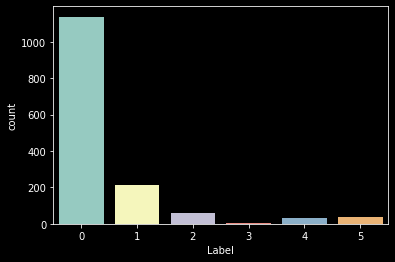

In [8]:
sns.countplot(x=df["Label"])# count plot with respect to Label Column
plt.show()

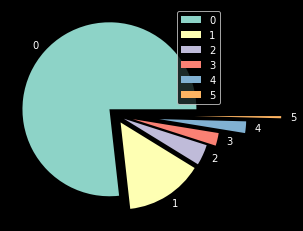

In [9]:
labels = [0,1,2,3,4,5] # define Labels Classes
sizes = df["Label"].value_counts()  # sizes based on count of each class
explode = [0.1, 0.1,0.1, 0.2, 0.5, 0.9]
cmap = plt.get_cmap('Spectral')
plt.pie(sizes,labels = labels,explode = explode)
plt.legend()
plt.show()

## Feature Selection -- Train Test Split

In [10]:
# train test split library from sklearn
from sklearn.model_selection import train_test_split

In [11]:
# splitting the data into train and test data set with indepent and dependent variables, test size of 15% and
X_train,X_test,y_train,y_test = train_test_split(df.index.values,df.Label.values,test_size=0.15,random_state=17,stratify=df.Label.values) 
# stratify with Label to get even train and test data for each class

In [12]:
X_train

array([614767094345936896, 610755488372948992, 610609791073931266, ...,
       613744184495894529, 610873494910443520, 610741907426267136],
      dtype=int64)

In [13]:
# new Column as data type to show the data is train or test used
df.loc[X_train,'data_type'] = 'train'
df.loc[X_test,'data_type'] = 'test'

In [14]:
df

,Text,Category,Label,data_type
Id,,,,
614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,0,train
614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy,0,train
614877582664835073,@Sofabsports thank you for following me back. ...,happy,0,train
611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy,0,train
611570404268883969,@NationalGallery @ThePoldarkian I have always ...,happy,0,train
...,...,...,...,...
611258135270060033,@_TheWhitechapel @Campaignforwool @SlowTextile...,not-relevant,1,train
612214539468279808,“@britishmuseum: Thanks for ranking us #1 in @...,happy,0,train
613678555935973376,MT @AliHaggett: Looking forward to our public ...,happy,0,train


In [15]:
df.groupby(['Category','Label','data_type']).count() # check train test split is even for all classes

Text
Category     Label data_type      
angry        2     test          9
                   train        48
disgust      3     test          1
                   train         5
happy        0     test        171
                   train       966
not-relevant 1     test         32
                   train       182
sad          4     test          5
                   train        27
surprise     5     test          5
                   train        30

## Build Model

In [16]:
#import transformers model from huggingface
from transformers import BertTokenizer # using it to tokanize the text in data set
from torch.utils.data import TensorDataset # to convert to TensorDataset form
from transformers import BertForSequenceClassification # importing the model

In [17]:
# defining the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True) # bert-base-uncased is a mask model used for fine tuning

In [18]:
# defining the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=len(dict_label),
                                                      output_attentions = False,
                                                      output_hidden_states = False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
# Encoding text by tokenizing using BERT Tokenizer and text will be encoded into tensor format
encoder_train = tokenizer.batch_encode_plus(df[df["data_type"]=='train'].Text.values,
                                            add_special_tokens = True,
                                            return_attention_mask = True,
                                            padding='max_length',
                                            max_length = 256,
                                            return_tensors = 'pt')

encoder_test = tokenizer.batch_encode_plus(df[df["data_type"]=='test'].Text.values,
                                            add_special_tokens = True,
                                            return_attention_mask = True,
                                            padding='max_length',
                                            max_length = 256,
                                            return_tensors = 'pt')


In [20]:
encoder_train

{'input_ids': tensor([[  101, 16092,  3897,  ...,     0,     0,     0],
        [  101,  1030, 27034,  ...,     0,     0,     0],
        [  101,  1030, 10682,  ...,     0,     0,     0],
        ...,
        [  101, 11047,  1030,  ...,     0,     0,     0],
        [  101,  1030,  3680,  ...,     0,     0,     0],
        [  101,  1030,  2120,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [21]:
# taking all the required data from encoded tensors
input_ids_train = encoder_train['input_ids']
attention_masks_train = encoder_train['attention_mask']
labels_train = torch.tensor(df[df['data_type']=='train'].Label.values) # take the labels of all data and covert it to tensor format

input_ids_test = encoder_test['input_ids']
attention_masks_test = encoder_test['attention_mask']
labels_test = torch.tensor(df[df['data_type']=='test'].Label.values)

In [22]:
# converting it to TensorDataset format to feed into the model
data_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
data_test = TensorDataset(input_ids_test,attention_masks_test,labels_test)

In [23]:
len(data_train),len(data_test)

(1258, 223)

In [24]:
# import RandomSampler and DataLoader
from torch.utils.data import RandomSampler,SequentialSampler,DataLoader

In [25]:
# Randmon Sampler Samples elements from the dataset randomly without replacement
# data loader,randomsampler to load data in an iterable format but extracting different subsamples from dataset.
# batch size means 16 rows per epoch 
dataloader_train = DataLoader(data_train,
                             sampler=RandomSampler(data_train),
                             batch_size =16)
dataloader_test = DataLoader(data_test,
                             sampler=RandomSampler(data_test),
                             batch_size =32)

In [26]:
# importing optimizer
from transformers import AdamW,get_linear_schedule_with_warmup

In [39]:
optimizer = AdamW(model.parameters(),lr=1e-5,eps=1e-8)

#Create a schedule with a learning rate that decreases linearly from the initial lr set in the optimizer to 0,
#  after a warmup period during which it increases linearly from 0 to the initial lr set in the optimizer.
epochs = 5
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps=0,
                                           num_training_steps=len(dataloader_train)*epochs)

c:\Users\win10\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [40]:
from sklearn.metrics import f1_score

In [56]:
def f1_score_func(preds,labels):
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat,preds_flat,average = 'weighted')

def accuracy_per_class(preds,labels):
    label_dict_reverse = {v:k  for k,v in dict_label.items()}
    
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]  
        print(f"Class:{label_dict_reverse}")
        print(f"Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n")

In [47]:
import random
# seeting random seed to dandomizing the training process
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [48]:
# checking for gpu availabilty
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(f"Loading:{device}")

Loading:cuda


In [51]:
# model Validation Function
def evaluate(dataloader_val):
    model.eval() # to turn on evaluation mode
    
    loss_val_total = 0 #  define total loss
    predictions,true_vals = [],[]  
    
    for batch in tqdm(dataloader_val):
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':  batch[0],
                  'attention_mask':batch[1],
                  'labels': batch[2]
                 }
        with torch.no_grad():
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total +=loss.item()
        
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
        
        
    loss_val_avg = loss_val_total/len(dataloader_val)  
    
    predictions = np.concatenate(predictions,axis=0)
    true_vals = np.concatenate(true_vals,axis=0) 
    return loss_val_avg,predictions,true_vals

## Training and Saving the Model

In [52]:
# Training the model
for epoch in tqdm(range(1,epochs+1)):
    model.train()
    
    loss_train_total=0
    
    progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
    
    
    for batch in progress_bar:
        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {
            "input_ids":batch[0],
            "attention_mask":batch[1],
            "labels":batch[2]
            
        }
        outputs = model(**inputs)
        
        loss = outputs[0]
#         logits = outputs[1]
        loss_train_total +=loss.item()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
        
        optimizer.step()
        scheduler.step()
        
        
        progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
        torch.save(model.state_dict(),f'E:/Programming/Machine Learning/NLP/BERT_SentimentAnalysis/model/output/BERT_ft_epoch{epoch}.model')
    
    tqdm.write('\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training Loss: {loss_train_avg}')
    val_loss,predictions,true_vals = evaluate(dataloader_test)
    test_score = f1_score_func(predictions,true_vals)
    tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1:   0%|          | 0/79 [00:00<?, ?it/s]

C:\Users\win10\AppData\Local\Temp/ipykernel_16696/689519732.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 0.3184355705316308


  0%|          | 0/7 [00:00<?, ?it/s]

Val Loss:0.609500310250691
 Test Score:0.8191835598095354


Epoch: 2:   0%|          | 0/79 [00:00<?, ?it/s]

C:\Users\win10\AppData\Local\Temp/ipykernel_16696/689519732.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 0.2599784329156332


  0%|          | 0/7 [00:00<?, ?it/s]

Val Loss:0.5652897187641689
 Test Score:0.8275689400256044


Epoch: 3:   0%|          | 0/79 [00:00<?, ?it/s]

C:\Users\win10\AppData\Local\Temp/ipykernel_16696/689519732.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 0.22153010292426695


  0%|          | 0/7 [00:00<?, ?it/s]

Val Loss:0.5814829766750336
 Test Score:0.8397278802073387


Epoch: 4:   0%|          | 0/79 [00:00<?, ?it/s]

C:\Users\win10\AppData\Local\Temp/ipykernel_16696/689519732.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 0.21070195963205415


  0%|          | 0/7 [00:00<?, ?it/s]

Val Loss:0.5809657403400966
 Test Score:0.8397278802073387


Epoch: 5:   0%|          | 0/79 [00:00<?, ?it/s]

C:\Users\win10\AppData\Local\Temp/ipykernel_16696/689519732.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 0.20689072768805147


  0%|          | 0/7 [00:00<?, ?it/s]

Val Loss:0.5817472083227975
 Test Score:0.8397278802073387


## Loading the Saved Model

In [57]:
# Load Model
model.load_state_dict(torch.load("E:/Programming/Machine Learning/NLP/BERT_SentimentAnalysis/model/output/BERT_ft_epoch5.model"))# in case want to use the saved model
_,predictions,true_vals = evaluate(dataloader_test) # Evaluate with Test Set
accuracy_per_class(predictions,true_vals) # check accuracy

  0%|          | 0/7 [00:00<?, ?it/s]

Class:{0: 'happy', 1: 'not-relevant', 2: 'angry', 3: 'disgust', 4: 'sad', 5: 'surprise'}
Accuracy:165/171

Class:{0: 'happy', 1: 'not-relevant', 2: 'angry', 3: 'disgust', 4: 'sad', 5: 'surprise'}
Accuracy:18/32

Class:{0: 'happy', 1: 'not-relevant', 2: 'angry', 3: 'disgust', 4: 'sad', 5: 'surprise'}
Accuracy:8/9

Class:{0: 'happy', 1: 'not-relevant', 2: 'angry', 3: 'disgust', 4: 'sad', 5: 'surprise'}
Accuracy:0/1

Class:{0: 'happy', 1: 'not-relevant', 2: 'angry', 3: 'disgust', 4: 'sad', 5: 'surprise'}
Accuracy:0/5

Class:{0: 'happy', 1: 'not-relevant', 2: 'angry', 3: 'disgust', 4: 'sad', 5: 'surprise'}
Accuracy:1/5

